In [1]:
import sys, os
sys.path.append(os.path.realpath("../../../"))

In [1]:
%pip install treasury-ml-utils --extra-index-url https://arti.tw.ee/artifactory/api/pypi/pypi-internal/simple

Looking in indexes: https://pypi.org/simple, https://arti.tw.ee/artifactory/api/pypi/pypi-internal/simple
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached pandas-1.5.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached slack_sdk-3.37.0-py2.py3-none-any.whl.metadata (15 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached charset_normalizer-3.4.4-cp311-cp311-macosx_10_9_universal2.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
INFO: pip is looking at multiple versions of s3transfer to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 13.4 MB/s  0:00:01 eta 0:00:01
Using cached

In [5]:
from treasury_ml_utils.snowflake_utils import SnowflakeConnector

snowflake_client = SnowflakeConnector("joshua.choy@transferwise.com")

 pip install snowflake-connector-python[secure-local-storage]


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://transferwise.okta-emea.com/app/snowflake/exk4istpb5gZUyV8u0i7/sso/saml?SAMLRequest=nVJNc9owEP0rHvVsy3b5qgbIkFBatyRlwNBObsJeiIIsuVoZw7%2BvzEcmOSSHzuigkd7ue7vv9W8OhfT2YFBoNSBREBIPVKZzobYDskwnfo94aLnKudQKBuQISG6GfeSFLNmosk9qDn8rQOu5RgpZ8zEglVFMcxTIFC8Amc3YYnQ%2FZXEQMo4Ixjo6cinJUTiuJ2tLRmld10H9OdBmS%2BMwDGn4hTpUA%2FlEXlGUH3OURludaXktObiZ3qGIaNhqKBzCMcwuhbdCnVfwEcv6DEL2PU1n%2FuzXIiXe6DrdnVZYFWAWYPYig%2BV8ehaATsE8jbutuBdA5WegrOHSjwJUut5IvoNMF2VlXePA3egGcir1Vrh1JeMBKXciv%2F2Tddb7ieX1z9%2BtDXYsf56tj%2Fn0R7KI83rynHS%2Fya%2Fd1X37IcuIt7qaGzfmJogVJKqx1LqnMG77UeROGkas3WJxJwij%2BJF4Y2epUNyeKq%2B6nVKFGzC1QAj0znIfCuAnmbws6csEFA67lkBbrtvbx%2BVx1atC0aWImjbekXN82EmKGf7HUvr0dYNLGB%2BcP8l4pqXIjt5Em4Lb9%2B2Lguj0InJ%2Fc4IyKLiQozw3gOhslFLXdwa4dZm3pgJCh2fWt6

 pip install snowflake-connector-python[secure-local-storage]


9.36.1


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#hourly_data = pd.ExcelFile('data_hourly.xlsx')
#sheet_names =hourly_data.sheet_names

Matplotlib is building the font cache; this may take a moment.


In [12]:
df = snowflake_client.fetch(f"""
    SELECT *, ((BID_OUTRIGHT+OFFER_OUTRIGHT)/2) as mid
    FROM RPT_TREASURY.INT_ASSET_PRICING__FX_QUOTE_SNAPSHOT_HOURLY
    WHERE CCY_PAIR IN ('USDPHP', 'EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD','USDCAD', 'USDCNH', 'USDSGD')
    AND TENOR_CODE = 'SP'
    AND INSTRUMENT_TYPE = 'FXSpot'
    AND PROVIDER = 'BLOOMBERG'
    AND TIMESTAMP BETWEEN '2025-06-01 00:00:00' AND '2025-11-10 23:59:59'  
""")
ccy_df = df.pivot(index='timestamp', columns='ccy_pair', values='mid')
ccy_df.head()

ccy_pair,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCNH,USDJPY,USDPHP,USDSGD
timestamp,,,,,,,,,
2025-06-01 00:00:00,0.64315,1.13475,1.3459,0.59585,1.374,7.2051,144.025,55.7725,1.291
2025-06-01 01:00:00,0.64315,1.13475,1.3459,0.59585,1.374,7.2051,144.025,55.7725,1.291
2025-06-01 02:00:00,0.64315,1.13475,1.3459,0.59585,1.374,7.2051,144.025,55.7725,1.291
2025-06-01 03:00:00,0.64315,1.13475,1.3459,0.59585,1.374,7.2051,144.025,55.7725,1.291
2025-06-01 04:00:00,0.64315,1.13475,1.3459,0.59585,1.374,7.2051,144.025,55.7725,1.291


In [ ]:
# change to reference df

In [ ]:
# list for all processed dataframes
#all_df = []

# loop through the excel file and add each CCY to its own dataframe
'''
for sheet in sheet_names:
    df = pd.read_excel(hourly_data, sheet_name=sheet, header=3, usecols=[0, 1])

    # standardize datetime columns
    df.columns = ['DateTime', 'Price']
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df.set_index('DateTime', inplace=True)
    df.rename(columns={'Price': sheet}, inplace=True)
    print(sheet)
    print(df)

    all_df.append(df)
    '''

In [13]:
ccy_df.columns

Index(['AUDUSD', 'EURUSD', 'GBPUSD', 'NZDUSD', 'USDCAD', 'USDCNH', 'USDJPY',
       'USDPHP', 'USDSGD'],
      dtype='object', name='ccy_pair')

In [14]:
# rebasing all CCYs to USD, note that PHP is using 1m NDF

rebased_ccy_df = ccy_df.copy()
rebased_ccy_df['USDPHP'] = 1 / rebased_ccy_df['USDPHP']
rebased_ccy_df['USDCNH'] = 1 / rebased_ccy_df['USDCNH']
rebased_ccy_df['USDSGD'] = 1 / rebased_ccy_df['USDSGD']
rebased_ccy_df['USDJPY'] = 1 / rebased_ccy_df['USDJPY']
rebased_ccy_df['USDCAD'] = 1 / rebased_ccy_df['USDCAD']

rebased_ccy_df.rename(columns={
                  'USDPHP': 'PHPUSD',
                  'USDCNH': 'CNHUSD',
                  'USDSGD': 'SGDUSD',
                  'NZDUSD': 'NZDUSD',
                  'AUDUSD': 'AUDUSD',
                  'USDCAD': 'CADUSD',
                  'USDJPY': 'JPYUSD',
                  }, inplace=True
                  )

rebased_ccy_df.head()

ccy_pair,AUDUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CNHUSD,JPYUSD,PHPUSD,SGDUSD
timestamp,,,,,,,,,
2025-06-01 00:00:00,0.64315,1.13475,1.3459,0.59585,0.727802,0.138791,0.006943,0.01793,0.774593
2025-06-01 01:00:00,0.64315,1.13475,1.3459,0.59585,0.727802,0.138791,0.006943,0.01793,0.774593
2025-06-01 02:00:00,0.64315,1.13475,1.3459,0.59585,0.727802,0.138791,0.006943,0.01793,0.774593
2025-06-01 03:00:00,0.64315,1.13475,1.3459,0.59585,0.727802,0.138791,0.006943,0.01793,0.774593
2025-06-01 04:00:00,0.64315,1.13475,1.3459,0.59585,0.727802,0.138791,0.006943,0.01793,0.774593


In [15]:
# missing NA values
rebased_ccy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3912 entries, 2025-06-01 00:00:00 to 2025-11-10 23:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUDUSD  3912 non-null   float64
 1   EURUSD  3912 non-null   float64
 2   GBPUSD  3912 non-null   float64
 3   NZDUSD  3912 non-null   float64
 4   CADUSD  3912 non-null   float64
 5   CNHUSD  3912 non-null   float64
 6   JPYUSD  3912 non-null   float64
 7   PHPUSD  3912 non-null   float64
 8   SGDUSD  3912 non-null   float64
dtypes: float64(9)
memory usage: 305.6 KB


In [ ]:
'''
# localize timezone to UTC
# keep data only when there is a real print

if rebased_ccy_df.index.tz is None:
    rebased_ccy_df.index = rebased_ccy_df.index.tz_localize("UTC")
else:
    rebased_ccy_df.index = rebased_ccy_df.index.tz_convert("UTC")

rebased_ccy_df.head()
'''

In [ ]:
'''
# number of missing data points

missing_data = rebased_ccy_df.isna().groupby(rebased_ccy_df.index.date).sum()
missing_data[missing_data.sum(axis=1)>0].sum()
'''

In [ ]:
# keeping only rows with php data

#aligned_df = rebased_ccy_df[rebased_ccy_df['PHPUSD'].notna()]
#aligned_df.info()

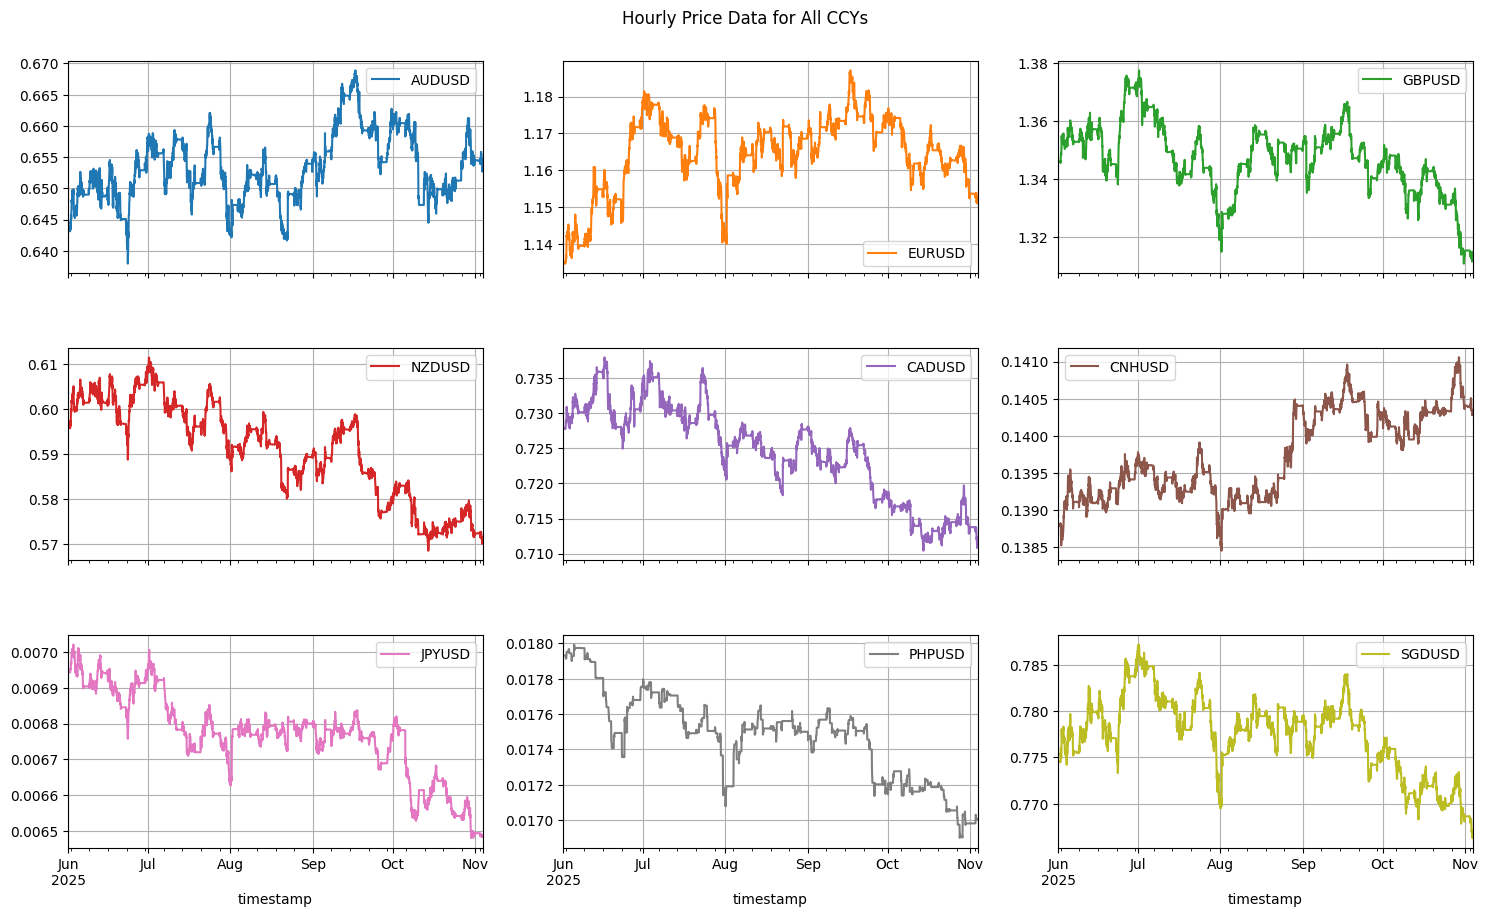

In [8]:
# plotting all ccys graphically

rebased_ccy_df.plot(
    subplots=True,
    layout=(4,3),
    figsize=(15,12),
    title='Hourly Price Data for All CCYs',
    grid=True,
    sharex=True
)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [9]:
# calculating log hourly returns

log_returns = np.log(rebased_ccy_df/rebased_ccy_df.shift(1))
log_returns = log_returns.dropna()
log_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3743 entries, 2025-06-01 01:00:00 to 2025-11-03 23:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUDUSD  3743 non-null   float64
 1   EURUSD  3743 non-null   float64
 2   GBPUSD  3743 non-null   float64
 3   NZDUSD  3743 non-null   float64
 4   CADUSD  3743 non-null   float64
 5   CNHUSD  3743 non-null   float64
 6   JPYUSD  3743 non-null   float64
 7   PHPUSD  3743 non-null   float64
 8   SGDUSD  3743 non-null   float64
dtypes: float64(9)
memory usage: 292.4 KB


<Figure size 1000x800 with 0 Axes>

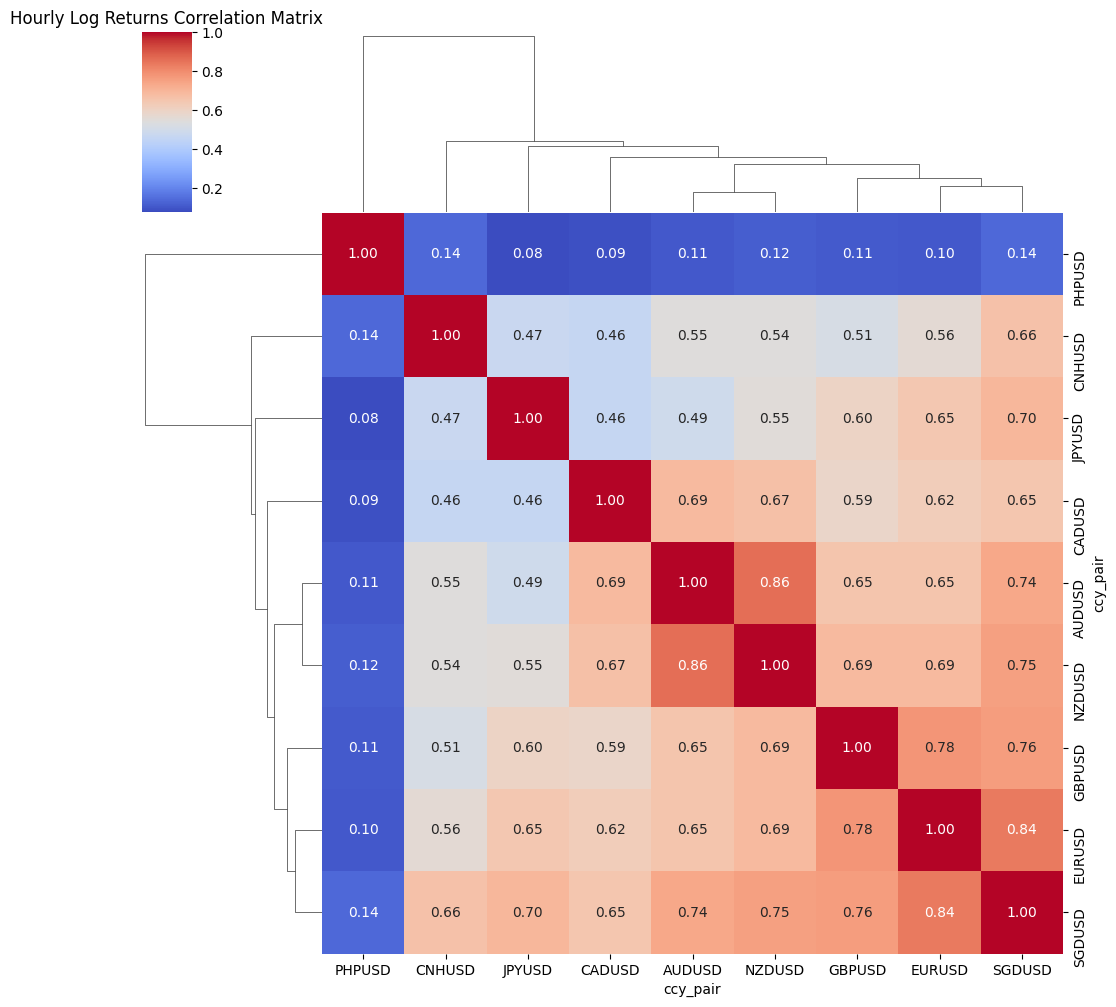

In [10]:
# plotting out correlation matrix

matrix = log_returns.corr()

plt.figure(figsize=(10,8))
sns.clustermap(
    matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Hourly Log Returns Correlation Matrix')
plt.show()

In [11]:
# analysing using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = log_returns[['NZDUSD', 'SGDUSD', 'AUDUSD', 'GBPUSD', 'EURUSD', 'CNHUSD', 'JPYUSD', 'CADUSD']]

vif_data = pd.DataFrame()
vif_data['Feature CCY'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  Feature CCY       VIF
0      NZDUSD  4.563250
1      SGDUSD  5.606729
2      AUDUSD  4.453444
3      GBPUSD  3.021640
4      EURUSD  4.094514
5      CNHUSD  1.814814
6      JPYUSD  2.042410
7      CADUSD  2.153458


vif = 1 means no correlation, 1-5 moderate correlation, >5 high correlation

# Regression analysis

In [12]:
# OLS regression

target = 'PHPUSD'
features = ['NZDUSD', 'SGDUSD', 'AUDUSD', 'EURUSD', 'CNHUSD', 'JPYUSD', 'CADUSD']

# splitting
split_point = int(len(log_returns) * 0.8)
train_df = log_returns.iloc[:split_point]
test_df = log_returns.iloc[split_point:]

# training and test dataset
Y_train = train_df[target]
X_train = train_df[features]

Y_test = test_df[target]
X_test = test_df[features]

# run ols regression with constant
ols_model = sm.OLS(Y_train, sm.add_constant(X_train), cov_type = 'HC3').fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 PHPUSD   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     9.538
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           9.10e-12
Time:                        16:07:07   Log-Likelihood:                 17701.
No. Observations:                2994   AIC:                        -3.539e+04
Df Residuals:                    2986   BIC:                        -3.534e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.291e-05    1.2e-05     -1.076      0.2

c:\Users\JoshuaChoy\Desktop\Github\ml-utils\.venv\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


p value < 0.05 = significant?
drop cadusd first

In [13]:
# prediction on train and test datatset

y_train_pred = ols_model.predict(sm.add_constant(X_train))
y_test_pred = ols_model.predict(sm.add_constant(X_test))

# residuals
train_residuals_ols = Y_train - y_train_pred
test_residuals_ols = Y_test - y_test_pred

# key hedge metrics
vr_train = 1 - train_residuals_ols.var()/Y_train.var()
vr_test  = 1 - test_residuals_ols.var()/Y_test.var()
mse_test = mean_squared_error(Y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"In-sample variance reduction (Train): {vr_train:.4%}") # explains how much of the variance in the target variable is explained by the model
print(f"OOS variance reduction (Test): {vr_test:.4%}") # explains how well the model generalizes to unseen data
print(f"Mean Squared Error: {mse_test:.4%}") # explains how well the model generalizes to unseen data
print(f"OOS RMSE: {rmse_test:.8f}") # provides an absolute measure of the average prediction error in the same units as the target variable

In-sample variance reduction (Train): 2.1870%
OOS variance reduction (Test): 3.5682%
Mean Squared Error: 0.0000%
OOS RMSE: 0.00047432


## removing AUD and CAD

In [14]:
# remove AUD and CAD

edited_features = ['NZDUSD', 'SGDUSD', 'EURUSD', 'CNHUSD', 'JPYUSD']

# splitting
#split_point = int(len(log_returns) * 0.8)
#train_df = log_returns.iloc[:split_point]
#test_df = log_returns.iloc[split_point:]

# training and test dataset
#Y_train = train_df[target]
X_train_no_aud = train_df[edited_features]

Y_test = test_df[target]
X_test_no_aud = test_df[edited_features]

# run ols regression with constant
ols_model_no_aud = sm.OLS(Y_train, sm.add_constant(X_train_no_aud), cov_type = 'HC3').fit()
print(ols_model_no_aud.summary())

                            OLS Regression Results                            
Dep. Variable:                 PHPUSD   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     13.34
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           6.98e-13
Time:                        16:08:48   Log-Likelihood:                 17701.
No. Observations:                2994   AIC:                        -3.539e+04
Df Residuals:                    2988   BIC:                        -3.535e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.288e-05    1.2e-05     -1.074      0.2

c:\Users\JoshuaChoy\Desktop\Github\ml-utils\.venv\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


In [15]:
# prediction on train and test datatset

y_train_pred_no_aud = ols_model_no_aud.predict(sm.add_constant(X_train_no_aud))
y_test_pred_no_aud = ols_model_no_aud.predict(sm.add_constant(X_test_no_aud))

# residuals
train_residuals_ols_no_aud = Y_train - y_train_pred_no_aud
test_residuals_ols_no_aud = Y_test - y_test_pred_no_aud

# key hedge metrics
vr_train = 1 - train_residuals_ols_no_aud.var()/Y_train.var()
vr_test  = 1 - test_residuals_ols_no_aud.var()/Y_test.var()
mse_test_no_aud = mean_squared_error(Y_test, y_test_pred_no_aud)
rmse_test_no_aud = np.sqrt(mse_test_no_aud)

print(f"In-sample variance reduction (Train): {vr_train:.4%}") # explains how much of the variance in the target variable is explained by the model
print(f"OOS variance reduction (Test): {vr_test:.4%}") # explains how well the model generalizes to unseen data
print(f"Mean Squared Error: {mse_test_no_aud:.4%}") # explains how well the model generalizes to unseen data
print(f"OOS RMSE: {rmse_test_no_aud:.8f}") # provides an absolute measure of the average prediction error in the same units as the target variable

In-sample variance reduction (Train): 2.1833%
OOS variance reduction (Test): 3.5121%
Mean Squared Error: 0.0000%
OOS RMSE: 0.00047445


## drop JPY


In [16]:
# remove AUD and CAD

edited_features = ['NZDUSD', 'SGDUSD', 'EURUSD', 'CNHUSD']

# splitting
#split_point = int(len(log_returns) * 0.8)
#train_df = log_returns.iloc[:split_point]
#test_df = log_returns.iloc[split_point:]

# training and test dataset
#Y_train = train_df[target]
X_train_no_jpy = train_df[edited_features]

Y_test = test_df[target]
X_test_no_jpy = test_df[edited_features]

# run ols regression with constant
ols_model_no_jpy = sm.OLS(Y_train, sm.add_constant(X_train_no_jpy), cov_type = 'HC3').fit()
print(ols_model_no_jpy.summary())

                            OLS Regression Results                            
Dep. Variable:                 PHPUSD   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     15.84
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           7.85e-13
Time:                        16:09:55   Log-Likelihood:                 17700.
No. Observations:                2994   AIC:                        -3.539e+04
Df Residuals:                    2989   BIC:                        -3.536e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.25e-05    1.2e-05     -1.042      0.2

c:\Users\JoshuaChoy\Desktop\Github\ml-utils\.venv\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


In [17]:
# prediction on train and test datatset HAVE NOT DONE THIS FOR JPY YET

y_train_pred_no_jpy = ols_model_no_jpy.predict(sm.add_constant(X_train_no_jpy))
y_test_pred_no_jpy = ols_model_no_jpy.predict(sm.add_constant(X_test_no_jpy))

# residuals
train_residuals_ols_no_jpy = Y_train - y_train_pred_no_jpy
test_residuals_ols_no_jpy = Y_test - y_test_pred_no_jpy

# key hedge metrics
vr_train = 1 - train_residuals_ols_no_jpy.var()/Y_train.var()
vr_test  = 1 - test_residuals_ols_no_jpy.var()/Y_test.var()
mse_test_no_jpy = mean_squared_error(Y_test, test_residuals_ols_no_jpy)
rmse_test_no_jpy = np.sqrt(mse_test_no_jpy)

print(f"In-sample variance reduction (Train): {vr_train:.4%}") # explains how much of the variance in the target variable is explained by the model
print(f"OOS variance reduction (Test): {vr_test:.4%}") # explains how well the model generalizes to unseen data
print(f"Mean Squared Error: {mse_test_no_jpy:.4%}") # explains how well the model generalizes to unseen data
print(f"OOS RMSE: {rmse_test_no_jpy:.8f}") # provides an absolute measure of the average prediction error in the same units as the target variable

In-sample variance reduction (Train): 2.0752%
OOS variance reduction (Test): 4.0765%
Mean Squared Error: 0.0000%
OOS RMSE: 0.00008166


# drop nzdusd



In [18]:
# remove NZD

edited_features = ['SGDUSD', 'EURUSD', 'CNHUSD']

# splitting
#split_point = int(len(log_returns) * 0.8)
#train_df = log_returns.iloc[:split_point]
#test_df = log_returns.iloc[split_point:]

# training and test dataset
#Y_train = train_df[target]
X_train_no_nzd = train_df[edited_features]

Y_test = test_df[target]
X_test_no_nzd = test_df[edited_features]

# run ols regression with constant
ols_model_no_nzd = sm.OLS(Y_train, sm.add_constant(X_train_no_nzd), cov_type = 'HC3').fit()
print(ols_model_no_nzd.summary())

                            OLS Regression Results                            
Dep. Variable:                 PHPUSD   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     20.74
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           2.69e-13
Time:                        16:10:18   Log-Likelihood:                 17699.
No. Observations:                2994   AIC:                        -3.539e+04
Df Residuals:                    2990   BIC:                        -3.537e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.273e-05    1.2e-05     -1.062      0.2

c:\Users\JoshuaChoy\Desktop\Github\ml-utils\.venv\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


In [ ]:
# multi beta with all 3
# multi beta with sgd and eur



In [19]:
# prediction on train and test datatset HAVE NOT DONE THIS FOR JPY YET

y_train_pred_no_nzd = ols_model_no_nzd.predict(sm.add_constant(X_train_no_nzd))
y_test_pred_no_nzd = ols_model_no_nzd.predict(sm.add_constant(X_test_no_nzd))

# residuals
train_residuals_ols_no_nzd = Y_train - y_train_pred_no_nzd
test_residuals_ols_no_nzd = Y_test - y_test_pred_no_nzd

# key hedge metrics
vr_train = 1 - train_residuals_ols_no_nzd.var()/Y_train.var()
vr_test  = 1 - test_residuals_ols_no_nzd.var()/Y_test.var()
mse_test_no_nzd = mean_squared_error(Y_test, test_residuals_ols_no_nzd)
rmse_test_no_nzd = np.sqrt(mse_test_no_nzd)

print(f"In-sample variance reduction (Train): {vr_train:.4%}") # explains how much of the variance in the target variable is explained by the model
print(f"OOS variance reduction (Test): {vr_test:.4%}") # explains how well the model generalizes to unseen data
print(f"Mean Squared Error: {mse_test_no_nzd:.4%}") # explains how well the model generalizes to unseen data
print(f"OOS RMSE: {rmse_test_no_nzd:.8f}") # provides an absolute measure of the average prediction error in the same units as the target variable

In-sample variance reduction (Train): 2.0385%
OOS variance reduction (Test): 4.0362%
Mean Squared Error: 0.0000%
OOS RMSE: 0.00007929


In [ ]:
# plot ACF and PACF of residuals    

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(test_residuals_ols, lags=20)
#plot_pacf(residuals, lags=20)

In [ ]:
# run WLS

eps = ols_model.resid

win = 48  # rolling window length
var_proxy = eps.rolling(win, min_periods=win//2).var()
var_proxy = var_proxy.fillna(var_proxy.median())

# floor & cap variance to avoid infinite or extreme weights
var_proxy = var_proxy.clip(
    lower=np.percentile(var_proxy.dropna(), 5),
    upper=np.percentile(var_proxy.dropna(), 95)
)

weights = 1.0 / var_proxy
weights = weights.reindex(Y_train.index).fillna(weights.median())

wls_model = sm.WLS(Y_train, X_train, weights=weights).fit()
print(wls_model.summary())

In [ ]:
# evaluate WLS model on test dataset

y_test_pred_train = wls_model.predict(X_train)
y_test_pred_wls = wls_model.predict(X_test)
resid_test_wls  = Y_test - y_test_pred_wls

# residuals
train_residuals_wls = Y_train - y_test_pred_train
test_residuals_wls = Y_test - y_test_pred_wls

# key hedge metrics
vr_train_wls = 1 - train_residuals_wls.var()/Y_train.var()
vr_test_wls  = 1 - test_residuals_wls.var()/Y_test.var()
mse_test_wls = mean_squared_error(Y_test, y_test_pred_wls)
rmse_test_wls = np.sqrt(mse_test_wls)

print(f"In-sample variance reduction (Train): {vr_train_wls:.2%}") # explains how much of the variance in the target variable is explained by the model
print(f"OOS variance reduction (Test): {vr_test_wls:.2%}") # explains how
print(f"Mean Squared Error: {mse_test_wls:.2%}") # explains how well the model generalizes to unseen data
print(f"OOS RMSE: {rmse_test_wls:.8f}") # provides an absolute measure of the average prediction error in the same units as the target variable

# l2 ridge regression

In [ ]:
# l2 ridge regression with only eur, sgd and cnh 

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

# time series cv

tscv = TimeSeriesSplit(n_splits=5)
alphas = np.logspace(-10, 0, 10)

# define pipeline

ridge_pipe = Pipeline([('scaler', StandardScaler()),
                       ('ridge', RidgeCV(alphas=alphas, cv=tscv, fit_intercept=True))])

ridge_pipe.fit(X_train_no_nzd, Y_train)

# evaluate performance
y_train_pred_ridge = ridge_pipe.predict(X_train_no_nzd)
y_test_pred_ridge = ridge_pipe.predict(X_test_no_nzd)
resid_test_ridge = Y_test - y_test_pred_ridge
ridge_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred_ridge))
ridge_vr = 1 - np.var(Y_test-y_test_pred_ridge)/Y_test.var()

print(f"Ridge OOS RMSE: {ridge_rmse:.8f}")
print(f"Ridge OOS Variance Reduction: {ridge_vr:.2%}")

ridge_coefs = pd.Series(ridge_pipe.named_steps['ridge'].coef_, index=edited_features)
print(ridge_coefs)
print(f"Best alpha: {ridge_pipe.named_steps['ridge'].alpha_}")

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, y_test_pred_ridge))

# lasso regression

In [ ]:
# l1 lasso regression

from sklearn.linear_model import LassoCV
lasso_pipe = Pipeline([('scaler', StandardScaler()),
                       ('lasso', LassoCV(alphas=alphas, cv=tscv, fit_intercept=True, max_iter=10000))])
lasso_pipe.fit(X_train_no_nzd, Y_train)

# evaluate performance
y_train_pred_lasso = lasso_pipe.predict(X_train_no_nzd)
y_test_pred_lasso = lasso_pipe.predict(X_test_no_nzd)
resid_test_lasso = Y_test - y_test_pred_lasso
lasso_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred_lasso))
lasso_vr = 1 - np.var(Y_test-y_test_pred_lasso)/Y_test.var()

print(f"Lasso OOS RMSE: {lasso_rmse:.8f}")
print(f"Lasso OOS Variance Reduction: {lasso_vr:.2%}")
print(r2_score(Y_test, y_test_pred_lasso))

### OLS Regression with all variables

In [ ]:
# split data into training/test and run OLS

split_point = int(len(log_returns_reduced) * 0.8)
train_df = log_returns_reduced.iloc[:split_point]
test_df = log_returns_reduced.iloc[split_point:]

# run OLS on training data

y = train_df['PHPUSD']
x = train_df.drop('PHPUSD', axis=1)
x = sm.add_constant(x)

ols_model = sm.OLS(y, x).fit()
print(ols_model.summary())

In [ ]:
# running on test data

y_test = test_df['PHPUSD']
x_test = test_df.drop('PHPUSD', axis=1)
x_test = sm.add_constant(x_test)

# use above model to make predictions
predictions = ols_model.predict(x_test)

# metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std_dev = y_test.std()

print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"Std Dev: {std_dev:.6f}")

if rmse < std_dev:
    print("✅ The model performs better than simply guessing the average.")
else:
    print("⚠️ The model does not appear to have strong predictive power on unseen data.")

### Running OLS on individual pairs

In [ ]:
# running OLS 1-1 individually

pred_ccys = ['SGDUSD', 'CNHUSD', 'AUDUSD', 'EURUSD']
simple_beta_results = []
fitted_models = {} # to store the train models

for currency in pred_ccys:
    Y = train_df['PHPUSD']
    X = train_df[[currency]]
    X = sm.add_constant(X)

    # fit model
    model = sm.OLS(Y, X).fit()
    fitted_models[currency] = model

    simple_beta_results.append(
        {'Currency': currency,
         'Beta': model.params[currency],
         'P-value': model.pvalues[currency],
         'Adj R-Squared': model.rsquared_adj}
    )

results_df = pd.DataFrame(simple_beta_results)
print(results_df)

In [ ]:
# test data

for currency in pred_ccys:
    trained_model = fitted_models[currency]

    # test data
    Y_test = test_df['PHPUSD']
    X_test = test_df[[currency]]
    X_test = sm.add_constant(X_test)

    predictions = trained_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    print(f"  RMSE for {currency} model: {rmse:.6f}")


### running regressions on 30 day time periods 

check if beta is stable 

In [ ]:
# get data and return model from ccy

def get_regression_results(data_chunk, currency):
    # Make sure we have enough data to run a regression
    if len(data_chunk) < 20: # At least 20 hours of data
        return np.nan
        
    Y = data_chunk['PHPUSD']
    X = data_chunk[currency] 
    X = sm.add_constant(X)
    
    model = sm.OLS(Y, X).fit()

    predictions = model.predict()
    rmse = np.sqrt(mean_squared_error(Y, predictions))

    # Return all the important stats
    return {
        'Beta': model.params[currency],
        'P-value': model.pvalues[currency],
        'Adj. R-squared': model.rsquared_adj,
        'RMSE': rmse,
        'Std Dev of PHP': Y.std()
    }

In [ ]:
# --- Step 2: Group the data into 30-day periods and apply the function ---
# We use pd.Grouper(freq='30D') to create non-overlapping 30-day blocks.

# pred_ccys = ['SGDUSD', 'CNHUSD', 'AUDUSD', 'EURUSD']
all_period_results = []

for currency in pred_ccys:
    # Use a lambda function to correctly apply the function to each 30-day group
    monthly_results = log_returns_reduced.groupby(pd.Grouper(freq='30D')).apply(lambda x: get_regression_results(x, currency)).dropna() # Drop periods with not enough data
    
    # Add currency identifier and combine results
    monthly_results_df = pd.DataFrame(monthly_results.tolist(), index=monthly_results.index)
    monthly_results_df['Currency'] = currency
    all_period_results.append(monthly_results_df)

# --- Step 3: Display the Final Results Table ---
final_results_df = pd.concat(all_period_results).reset_index()
final_results_df.rename(columns={'index': 'Period_Start'}, inplace=True)

print("--- ✅ Analysis Results for Each 30-Day Period ---")
final_results_df.head()

In [ ]:
final_results_df[final_results_df['Currency'] == 'SGDUSD']

In [ ]:
beta_over_time = final_results_df.pivot(index='Period_Start', columns='Currency', values='Beta')

print("--- Betas Over Time ---")
print(beta_over_time)

# plotting the betas over time
beta_over_time.plot(
    subplots=True,         
    layout=(2, 2),         
    figsize=(15, 8),       
    title='Beta Stability for Each Currency Over 30-Day Periods',
    grid=True,
    legend=True,          
    style='o-'            
)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) 
plt.show()

## Splitting up beta hedging via time

Given EURUSD, GBPUSD do not move as much in APAC hours, can explore the idea of having 2 separate beta buckets to hedge PHP risk

APAC hours (SGD, CNH, AUD)
LDN hours (SGD, CNH, AUD + EUR)

In [ ]:
# APAC hours

apac_df = log_returns_reduced.between_time('07:00', '14:00')
apac_df.index.hour.unique().sort_values()

split_point = int(len(apac_df) * 0.8)
apac_df_train = apac_df.iloc[:split_point]
apac_df_test = apac_df.iloc[split_point:]



# LDN/NYK hours
ldn_nyk_df = log_returns_reduced[~log_returns_reduced.index.isin(apac_df.index)]
ldn_nyk_df.index.hour.unique().sort_values()

split_point = int(len(ldn_nyk_df) * 0.8)
ldn_nyk_df_train = ldn_nyk_df.iloc[:split_point]
ldn_nyk_df_test = ldn_nyk_df.iloc[split_point:]

In [ ]:
# running regression only for APAC hours on training data

apac_predictors = ['SGDUSD', 'CNHUSD', 'AUDUSD']
apac_train_results = []
fitted_apac_models = {} # to store the train models

for currency in apac_predictors:
    Y = apac_df_train['PHPUSD']
    X = apac_df_train[[currency]]
    X = sm.add_constant(X)

    # fit model
    model = sm.OLS(Y, X).fit()

    fitted_apac_models[currency] = model

    apac_train_results.append(
        {'Currency': currency,
         'Beta': model.params[currency],
         'P-value': model.pvalues[currency],
         'Adj R-Squared': model.rsquared_adj}
    )

apac_results_df = pd.DataFrame(apac_train_results)
print(apac_results_df)



# running fitted models on the test data

for currency in apac_predictors:
    trained_model = fitted_apac_models[currency]

    # test data
    Y_test = apac_df_test['PHPUSD']
    X_test = apac_df_test[[currency]]
    X_test = sm.add_constant(X_test)

    predictions = trained_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    print(f"  RMSE for {currency} model: {rmse:.6f}")

In [ ]:
# running regression only for LDN/NYK hours

ldn_predictors = ['EURUSD', 'AUDUSD', 'CNHUSD', 'SGDUSD']
ldn_results = []
fitted_ldn_models = {} # to store the train models


for currency in ldn_predictors:
    Y = ldn_nyk_df_train['PHPUSD']
    X = ldn_nyk_df_train[[currency]]
    X = sm.add_constant(X)

    # fit model
    model = sm.OLS(Y, X).fit()

    fitted_ldn_models[currency] = model

    ldn_results.append(
        {'Currency': currency,
         'Beta': model.params[currency],
         'P-value': model.pvalues[currency],
         'Adj R-Squared': model.rsquared_adj}
    )

ldn_results_df = pd.DataFrame(ldn_results)
print(ldn_results_df)



# running fitted models on the test data

for currency in ldn_predictors:
    trained_model = fitted_ldn_models[currency]

    # test data
    Y_test = ldn_nyk_df_test['PHPUSD']
    X_test = ldn_nyk_df_test[[currency]]
    X_test = sm.add_constant(X_test)

    predictions = trained_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    print(f"  RMSE for {currency} model: {rmse:.6f}")

### Using elastic net

In [ ]:
# using elastic net?

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

y_train = train_df['PHPUSD']
x_train = train_df.drop('PHPUSD', axis=1)

# defining parameters to test

params = {
    'alpha': [1e-9 ,1e-7, 1e-6, 1e-5, 1e-4],  # Test different penalty strengths
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # Test different model types
}

# running grid search

grid_search = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5
)

grid_search.fit(x_train, y_train)

# --- 3. View the Optimal Results ---
print(f"\n--- Best Model Parameters Found ---")
print(grid_search.best_params_)

print("\n--- Final Coefficients from Best Model ---")
best_model = grid_search.best_estimator_
final_coefficients = pd.Series(best_model.coef_, index=x_train.columns)
print(final_coefficients)

In [ ]:
# --- 1. Set Up and Run the Bootstrap ---
n_iterations = 1000
bootstrap_coefs = []

for i in range(n_iterations):
    # Create a bootstrap sample by sampling with replacement
    sample_df = train_df.sample(n=len(train_df), replace=True)
    
    # Define Y and X for the bootstrap sample
    Y_sample = sample_df['PHP']
    X_sample = sample_df.drop('PHP', axis=1)
    X_sample = sm.add_constant(X_sample)
    
    # Fit the OLS model
    model = sm.OLS(Y_sample, X_sample).fit()
    
    # Store the coefficients from this run
    bootstrap_coefs.append(model.params)

# Convert the list of coefficients to a DataFrame for easy analysis
bootstrap_results = pd.DataFrame(bootstrap_coefs)

print("--- Bootstrap Results Summary (Distribution of Betas) ---")
print(bootstrap_results.describe())

In [ ]:
# --- 2. Correctly Visualize the Bootstrap Results ---
# We now plot the distributions of the coefficients we collected

bootstrap_results.drop('const', axis=1).hist(
    bins=30,
    figsize=(15, 10),
    layout=(3, 2),
    grid=False
)

plt.suptitle('Distribution of Betas from 1,000 Bootstrap Runs', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# running individual regression

predictor_ccys = ['EUR', 'GBP', 'AUD', 'CNH', 'SGD']
simple_beta_results = []

for ccy in predictor_ccys:
    Y = train_df['PHP']
    X = train_df[[ccy]]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    
    simple_beta_results.append({
        'Currency': ccy,
        'Beta': model.params[ccy],
        'P-value': model.pvalues[ccy]
    })


results_df = pd.DataFrame(simple_beta_results)
print(results_df)

In [ ]:
rolling_beta = log_returns['GBP'].rolling(window=30*24).cov(log_returns['PHP']) / log_returns['GBP'].rolling(window=30*24).var()


# Using internal tick data

#df = pd.read_csv('hourly_rates.csv')
#df['UPDATE_TIMESTAMP'] = pd.to_datetime(df['UPDATE_TIMESTAMP'])

# Pivot dataframe, UPDATE_TIMESTAMP as the new index, create new colummns from the unique values in CCY_PAIR, fill table with values from the MID column
#final_df = df.pivot(index='UPDATE_TIMESTAMP', columns='CCY_PAIR', values='MID' )

#final_df.index_name = 'DateTime'
#final_df.head()

#final_df.info()